# Forecasting Models

## Table of Contents

### Multiple Linear Regression
[Multiple Linear Regression Model](#multipleregression)<br>
[Forecast vs Original Average Price Plot from Regression](#reggraph)<br>
[Normalised Root Mean Square Error (NRMSE) Results for Regression](#nrmse)<br>


### ARIMA
[ARIMA Model](#ARIMA)<br>
[Augmented Dickey Fuller Test Results](#ADF)<br>
[Order of Differencing](#orderofd)<br>
[Partial Auto Correlation Plots (PACF](#pacf)<br>
[Auto Correlation Plots (ACF)](#acf)<br>
[Normalising Data for ARIMA](#normalising)<br>
[Building ARIMA model](#arimamodel)<br>
[Forecast vs Original Average Price Plot from ARIMA](#arimaforecast)<br>
[Mean Absolute Perecentage Error (MAPE) Results for ARIMA](#mape)<br>


##    

## Importing Libraries

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings("ignore")



## Forecasting Property Prices in Each Borough

<a id='multipleregression'></a>

## Using Multiple Variable Linear Regression

In [2]:
test = pd.read_csv('C:/USers/ChengYao/Desktop/DAO2702/Project/Clean Data/df_yearly_summary.csv')

test.columns = ['BOROUGH','BUILDINGCLASSCAT','AVGSALEPRICE','YEAR','PERCENTINCREASE']
dummies1 = pd.get_dummies(test['BOROUGH'].astype('category'), prefix = 'B')
dummies2 = pd.get_dummies(test['BUILDINGCLASSCAT'].astype('category'),prefix ='BCG')

test1 =  pd.concat([test,dummies1,dummies2],axis = 1)

test1.columns = ['BOROUGH','BUILDINGCLASSCAT','AVGSALEPRICE','YEAR','PERCENTINCREASE','B_BRONX','B_BROOKLYN','B_MANHATTAN','B_QUEENS','B_STATENISLAND','BCG_ONE','BCG_TWO','BCG_THREE']

model = 'AVGSALEPRICE ~ YEAR + B_BROOKLYN + B_MANHATTAN + B_QUEENS + B_STATENISLAND + BCG_TWO + BCG_THREE'
print(ols(model,test1).fit().summary())

                            OLS Regression Results                            
Dep. Variable:           AVGSALEPRICE   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     149.1
Date:                Wed, 06 May 2020   Prob (F-statistic):           5.45e-73
Time:                        02:48:08   Log-Likelihood:                -2934.4
No. Observations:                 195   AIC:                             5885.
Df Residuals:                     187   BIC:                             5911.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.002e+08   3.27e+07     -3.

### We can see that the p-value for Brooklyn, Queens and Staten Island is above 0.05, thus we should remove it and see if Adjusted R^2 increases. Staten Island is the highest followed by Queens then Brooklyn. Thus we will be removing in that order

In [3]:
model = 'AVGSALEPRICE ~ YEAR + B_BROOKLYN + B_MANHATTAN + B_QUEENS + BCG_TWO + BCG_THREE'
print(ols(model,test1).fit().summary())

                            OLS Regression Results                            
Dep. Variable:           AVGSALEPRICE   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     174.9
Date:                Wed, 06 May 2020   Prob (F-statistic):           3.96e-74
Time:                        02:48:08   Log-Likelihood:                -2934.4
No. Observations:                 195   AIC:                             5883.
Df Residuals:                     188   BIC:                             5906.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.002e+08   3.26e+07     -3.077      

### We can see that adjusted R^2 has increased by 0.001. Although it's not a lot, it is still an improvement to the model. Next we will remove Queens since its p-value is still 0.325

In [4]:
model = 'AVGSALEPRICE ~ YEAR + B_BROOKLYN + B_MANHATTAN + BCG_TWO + BCG_THREE'
print(ols(model,test1).fit().summary())

                            OLS Regression Results                            
Dep. Variable:           AVGSALEPRICE   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     209.4
Date:                Wed, 06 May 2020   Prob (F-statistic):           4.62e-75
Time:                        02:48:08   Log-Likelihood:                -2935.0
No. Observations:                 195   AIC:                             5882.
Df Residuals:                     189   BIC:                             5902.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.002e+08   3.26e+07     -3.074      

### We can see that Adjusted R^2 actually doesn't change. This means that Queens was a useless variable and thus should be removed. We can see Brooklyn is still above 0.05, thus we will now remove it.


In [5]:
model = 'AVGSALEPRICE ~ YEAR + B_MANHATTAN + BCG_TWO + BCG_THREE'
print(ols(model,test1).fit().summary())

                            OLS Regression Results                            
Dep. Variable:           AVGSALEPRICE   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     257.6
Date:                Wed, 06 May 2020   Prob (F-statistic):           1.48e-75
Time:                        02:48:08   Log-Likelihood:                -2936.8
No. Observations:                 195   AIC:                             5884.
Df Residuals:                     190   BIC:                             5900.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.001e+08   3.28e+07     -3.052      

### We can see that adjusted r^2 actually dropped. This means that we should include Brooklyn in even though it's p-value is slightly above the significance level.


### Thus the final model will be <br> model = 'AVGSALEPRICE ~ YEAR  + B_BROOKLYN + B_MANHATTAN + BCG_TWO + BCG_THREE + PERCENTINCREASE' 

### Thus the equation will be <br> Average Sale Price = 37390(Year) + 266100(Brooklyn) + 4851000(Manhattan) - 603300(BCG_Two) - 779000(BCG_Three)  + 1169000(PercentIncrease) - 74280000

### Where Manhattan,BCG_Two,BCG_Three will only take values of 0 and 1. 0 is if it is NOT that category and 1 if it is.


In [6]:
test1['PREDICTION'] = (50250*test1['YEAR']) + (290500*test1['B_BROOKLYN']) + (4873000*test1['B_MANHATTAN']) - (593300*test1['BCG_TWO']) - (762200*test1['BCG_THREE']) - 100200000

In [7]:
test1.head(3)

,BOROUGH,BUILDINGCLASSCAT,AVGSALEPRICE,YEAR,PERCENTINCREASE,B_BRONX,B_BROOKLYN,B_MANHATTAN,B_QUEENS,B_STATENISLAND,BCG_ONE,BCG_TWO,BCG_THREE,PREDICTION
0,Manhattan,01 ONE FAMILY HOMES,7383111.0,2007,0.000000,0,0,1,0,0,1,0,0,5524750
1,Manhattan,01 ONE FAMILY HOMES,8926012.0,2008,0.208977,0,0,1,0,0,1,0,0,5575000
2,Manhattan,01 ONE FAMILY HOMES,6812888.0,2009,-0.236738,0,0,1,0,0,1,0,0,5625250


In [8]:
olslst = []
boroughlist1 = test1['BOROUGH'].unique()
for i in boroughlist1:
    df = test1.loc[(test1['BOROUGH'] == i)]
    olslst.append(df)

In [9]:
olslst[0]

,BOROUGH,BUILDINGCLASSCAT,AVGSALEPRICE,YEAR,PERCENTINCREASE,B_BRONX,B_BROOKLYN,B_MANHATTAN,B_QUEENS,B_STATENISLAND,BCG_ONE,BCG_TWO,BCG_THREE,PREDICTION
0,Manhattan,01 ONE FAMILY HOMES,7383111.0,2007,0.000000,0,0,1,0,0,1,0,0,5524750
1,Manhattan,01 ONE FAMILY HOMES,8926012.0,2008,0.208977,0,0,1,0,0,1,0,0,5575000
2,Manhattan,01 ONE FAMILY HOMES,6812888.0,2009,-0.236738,0,0,1,0,0,1,0,0,5625250
3,Manhattan,01 ONE FAMILY HOMES,6587094.0,2010,-0.033142,0,0,1,0,0,1,0,0,5675500
4,Manhattan,01 ONE FAMILY HOMES,7094131.0,2011,0.076974,0,0,1,0,0,1,0,0,5725750
5,Manhattan,01 ONE FAMILY HOMES,7481470.0,2012,0.054600,0,0,1,0,0,1,0,0,5776000
6,Manhattan,01 ONE FAMILY HOMES,6343062.0,2013,-0.152164,0,0,1,0,0,1,0,0,5826250
7,Manhattan,01 ONE FAMILY HOMES,9180342.0,2014,0.447304,0,0,1,0,0,1,0,0,5876500
8,Manhattan,01 ONE FAMILY HOMES,8838363.0,2015,-0.037251,0,0,1,0,0,1,0,0,5926750
9,Manhattan,01 ONE FAMILY HOMES,8176576.0,2016,-0.074877,0,0,1,0,0,1,0,0,5977000


In [10]:
def add5years(borough,cats):
    year = 2020
    lst1 = []
    for i in range(0,5):
        lst1.append([borough, '01 ONE FAMILY HOMES', np.nan , year, np.nan] + cats + [1,0,0,np.nan])
        year+=1
    
    year = 2020
    for i in range(0,5):
        lst1.append([borough, '02 TWO FAMILY HOMES', np.nan , year, np.nan] + cats + [0,1,0,np.nan])
        year+=1
    
    year = 2020
    for i in range(0,5):
        lst1.append([borough, '03 THREE FAMILY HOMES', np.nan , year, np.nan] + cats + [0,0,1,np.nan])
        year+=1

    dflst1 = pd.DataFrame(lst1)
    dflst1.columns = test1.columns
    
    return dflst1

In [11]:
manhattan5 = add5years('Manhattan',[0,0,1,0,0])
bronx5 = add5years('Bronx',[1,0,0,0,0])
brook5 = add5years('Brooklyn',[0,1,0,0,0])
queens5 = add5years('Queens',[0,0,0,1,0])
sisland5 = add5years('Staten Island',[0,0,0,0,1])


newmanhattan = pd.concat([olslst[0],manhattan5]).reset_index(drop=True)
newbronx = pd.concat([olslst[1],bronx5]).reset_index(drop=True)
newbrook = pd.concat([olslst[2],brook5]).reset_index(drop=True)
newqueens = pd.concat([olslst[3],queens5]).reset_index(drop=True)
newsisland = pd.concat([olslst[4],sisland5]).reset_index(drop=True)

totallst = [newmanhattan,newbronx,newbrook,newqueens,newsisland]

In [12]:
for i in totallst:
    i['PREDICTION'] = (50250*i['YEAR']) + (4800000*i['B_MANHATTAN']) - (593300*i['BCG_TWO']) - (762200*i['BCG_THREE']) - 100100000

In [13]:
names = ['Manhattan','Bronx','Brooklyn','Queens','Staten Island']

olsplot = []
for i in range(0,5):
    new = totallst[i][['BOROUGH','AVGSALEPRICE','YEAR','PREDICTION']]
    new = new.groupby('YEAR').mean()
    olsplot.append(new)
    
number_of_forecasts = 5


<a id='reggraph'></a>


## Forecast vs Original Price Graph

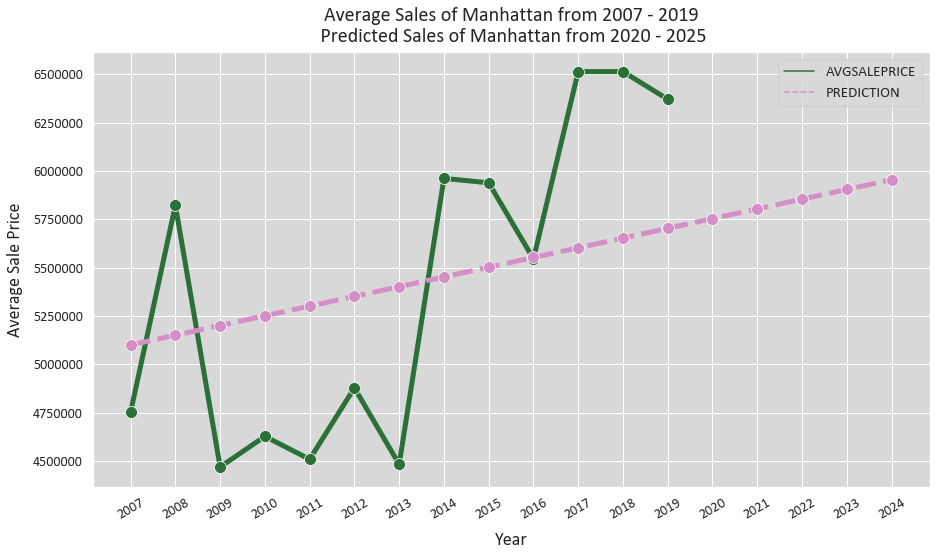

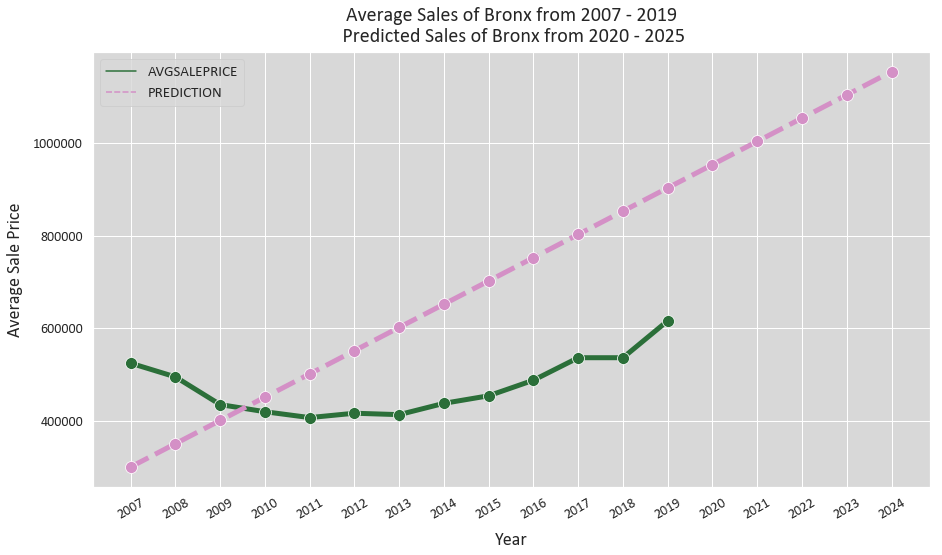

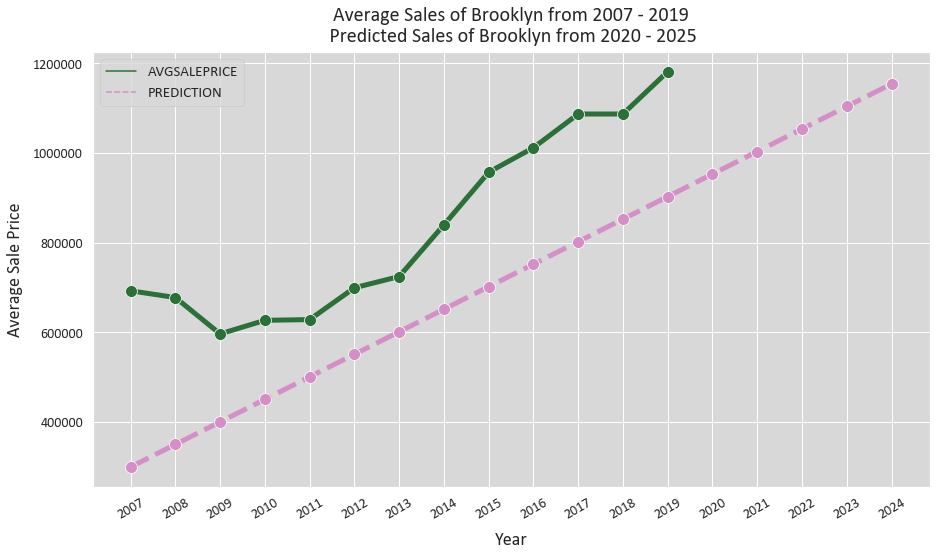

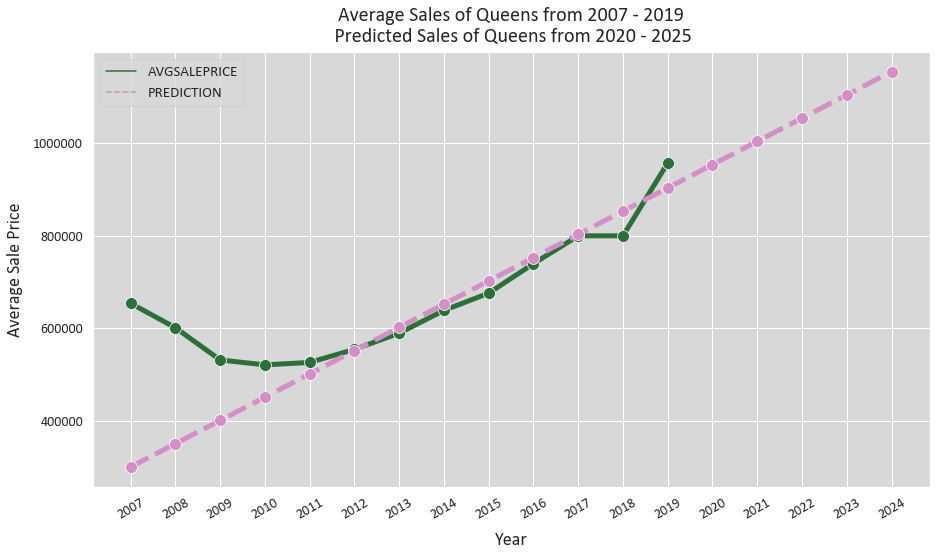

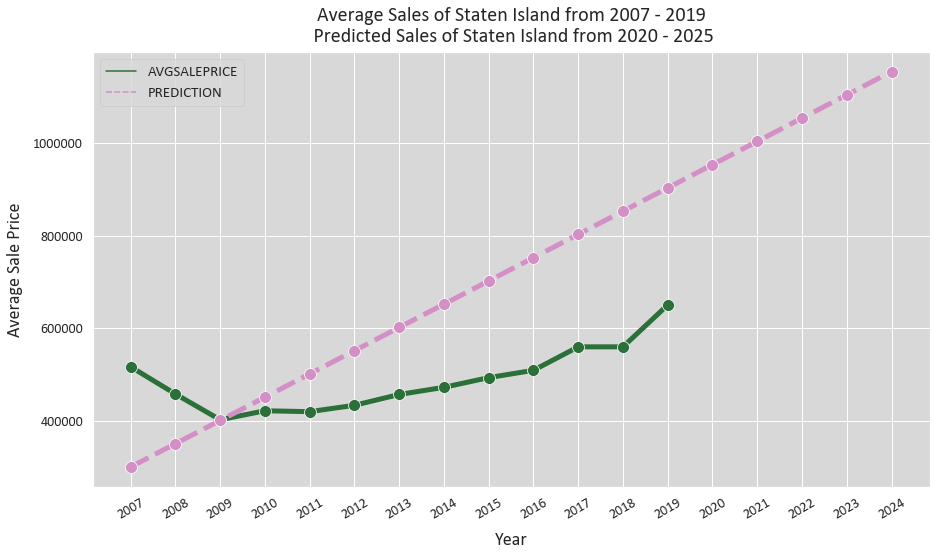

In [14]:
for i ,data in enumerate(olsplot):
    sns.set(style='darkgrid', font_scale=1.3, font="calibri", 
    rc={'axes.facecolor':'#d8d8d8'})
    plt.figure(figsize=(15,8))
    sns.lineplot(data= data , palette='cubehelix', lw=5, marker='o', ms=12)
    plt.xticks(data.index, data.index, rotation=30, fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('Year', labelpad=10, fontsize=18)
    plt.ylabel('Average Sale Price', labelpad=10, fontsize=18)
    plt.title\
    ("Average Sales of {0} from 2007 - 2019\n Predicted Sales of {0} from 2020 - {1}".\
             format(names[i], 2020 + number_of_forecasts), pad=10, fontsize=20)
    plt.legend(fontsize=15)
    plt.show()
    plt.show()

In [15]:
olsplot[0]

,AVGSALEPRICE,PREDICTION
YEAR,,
2007,4.752562e+06,5.099917e+06
2008,5.822176e+06,5.150167e+06
2009,4.468911e+06,5.200417e+06
2010,4.627137e+06,5.250667e+06
2011,4.508625e+06,5.300917e+06
2012,4.878140e+06,5.351167e+06
2013,4.482439e+06,5.401417e+06
2014,5.961247e+06,5.451667e+06
2015,5.938535e+06,5.501917e+06



<a id='nrmse'></a>





## NRMSE (Normalised Root Mean Square Error) for each Borough

In [16]:
for i in range(len(olsplot)):
    og = olsplot[i]['AVGSALEPRICE'].iloc[0:13,]
    new = olsplot[i]['PREDICTION'].iloc[0:13,]
    rmse = np.mean((new - og)**2)**.5
    nrmse = rmse/np.mean(og)
    print('NRMSE for ' + names[i] + '= ' + str(nrmse))
    print()


NRMSE for Manhattan= 0.12186743962663779

NRMSE for Bronx= 0.4398160351334768

NRMSE for Brooklyn= 0.29195478226859467

NRMSE for Queens= 0.1958485853913751

NRMSE for Staten Island= 0.378820072841412




<a id='ARIMA'></a>


##    





## Forecast Using ARIMA

## Importing Data and Storing it

In [17]:
df = pd.read_csv('Clean Data/df_yearly_summary.csv')
df_lst = []
for i in df['YEAR'].unique():  #Appending Dataframe into a list by year for each Borough
    df_lst.append(df[df['YEAR'] == i])
df_lst[0]

,BOROUGH,BUILDING CLASS CATEGORY,AVERAGE SALE PRICE,YEAR,% INCREASE
0,Manhattan,01 ONE FAMILY HOMES,7383111.0,2007,0.0
13,Manhattan,02 TWO FAMILY HOMES,4126525.0,2007,0.0
26,Manhattan,03 THREE FAMILY HOMES,2748050.0,2007,0.0
39,Bronx,01 ONE FAMILY HOMES,451970.0,2007,0.0
52,Bronx,02 TWO FAMILY HOMES,517028.0,2007,0.0
65,Bronx,03 THREE FAMILY HOMES,603445.0,2007,0.0
78,Brooklyn,01 ONE FAMILY HOMES,645548.0,2007,0.0
91,Brooklyn,02 TWO FAMILY HOMES,688668.0,2007,0.0
104,Brooklyn,03 THREE FAMILY HOMES,744142.0,2007,0.0
117,Queens,01 ONE FAMILY HOMES,547530.0,2007,0.0


In [18]:
mean_prices_df = []
for i in range(len(df_lst)):  #Grouping by Borough and year then finding the mean for all 3 prices and storing it into a list as a df again
    mean_prices_df.append(df_lst[i].groupby(['BOROUGH', 'YEAR']).mean().reset_index())
    
mean_prices_df[0]

,BOROUGH,YEAR,AVERAGE SALE PRICE,% INCREASE
0,Bronx,2007,5.241477e+05,0.0
1,Brooklyn,2007,6.927860e+05,0.0
2,Manhattan,2007,4.752562e+06,0.0
3,Queens,2007,6.534673e+05,0.0
4,Staten Island,2007,5.164007e+05,0.0


In [19]:
final_data = pd.concat(mean_prices_df, axis=0).reset_index(drop=True) #This combines all the df in the list into one big df

In [20]:
final_data_lst = []
boroughs = final_data['BOROUGH'].unique()
for i in boroughs:
    final_data_lst.append(final_data[final_data['BOROUGH'] == i]) #Same as earlier append dfs into a list, this time by Borough


for i in final_data_lst:
    i.reset_index(drop=True, inplace=True) #Resetting the index for each dataframe

final_df = final_data_lst
final_df[0]

,BOROUGH,YEAR,AVERAGE SALE PRICE,% INCREASE
0,Bronx,2007,524147.666667,0.000000
1,Bronx,2008,494574.666667,-0.054007
2,Bronx,2009,434719.000000,-0.118607
3,Bronx,2010,419288.666667,-0.033931
4,Bronx,2011,406601.333333,-0.029882
5,Bronx,2012,416030.666667,0.023690
6,Bronx,2013,412958.666667,-0.005131
7,Bronx,2014,437387.000000,0.058802
8,Bronx,2015,453748.000000,0.038598
9,Bronx,2016,487336.333333,0.073680


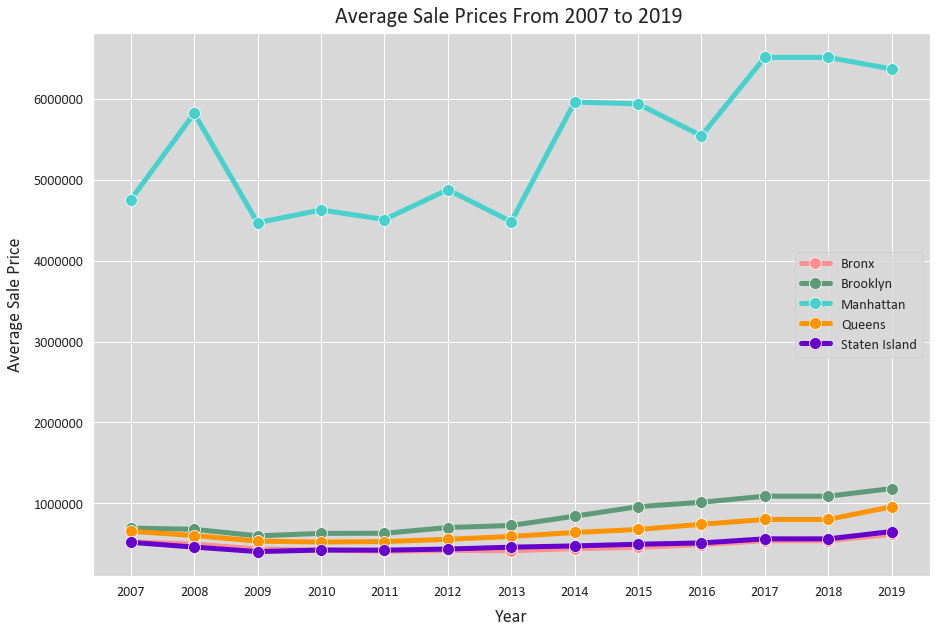

In [21]:
sns.set(style='darkgrid', font_scale=1.3, font="calibri", 
    rc={'axes.facecolor':'#d8d8d8'})
plt.figure(figsize=(15, 10))
colors = ['#ff9090', '#5e9a78', '#48d1cc', '#ff9400', '#6600cc']
for i in range(len(boroughs)):
    sns.lineplot(x='YEAR',
                    y='AVERAGE SALE PRICE',
                    data=final_df[i],
                    label=boroughs[i],
                marker='o',
                ms=12,
                color=colors[i], lw=5)
plt.xticks(final_df[0]['YEAR'], final_df[0]['YEAR'], fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year', labelpad=10, fontsize=18)
plt.ylabel('Average Sale Price', labelpad=10, fontsize=18)
plt.title("Average Sale Prices From 2007 to 2019 ", pad=10, fontsize=22)
plt.show()

### Based on our understanding, this data should not have any seasonality (in terms of years) or cyclical trend since property sale prices since there should not be a high price in every year or so. This is reflected in the plot above since we can see that there is a general increasing trend for the 4 boroughs apart from Manhattan. For all 5, there is no clear seasonality nor cyclical trend.



In [22]:
final_df[1]

,BOROUGH,YEAR,AVERAGE SALE PRICE,% INCREASE
0,Brooklyn,2007,6.927860e+05,0.000000
1,Brooklyn,2008,6.777180e+05,-0.021585
2,Brooklyn,2009,5.966653e+05,-0.117974
3,Brooklyn,2010,6.269570e+05,0.050767
4,Brooklyn,2011,6.285727e+05,0.002909
5,Brooklyn,2012,6.994893e+05,0.112146
6,Brooklyn,2013,7.246577e+05,0.035932
7,Brooklyn,2014,8.399460e+05,0.158921
8,Brooklyn,2015,9.572413e+05,0.139102
9,Brooklyn,2016,1.011916e+06,0.054057


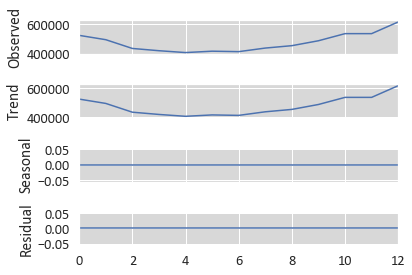

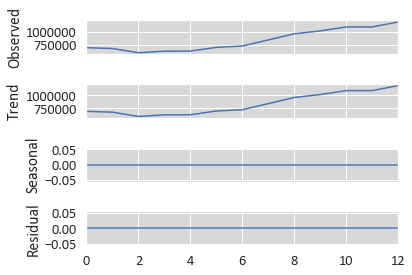

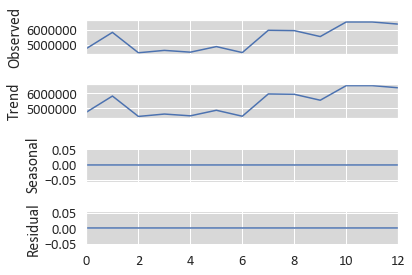

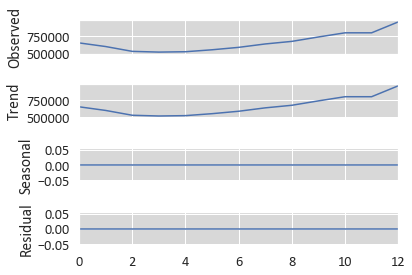

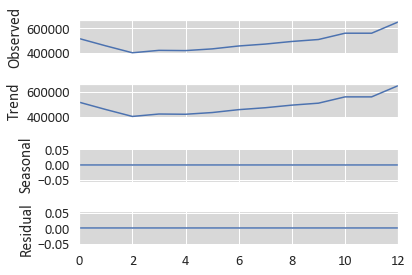

In [23]:
for i in range(0,5):
    a = seasonal_decompose(final_df[i]['AVERAGE SALE PRICE'],freq=1)
    a.plot()

### As you can see above, all Boroughs' Average Sale Prices show no Seasonality.


### Thus we will be choosing to forecast using ARIMA

### In ARIMA, there are three hyperparameters, p, d, q . 

### p is for the number of AutoRegressive Terms <br> d is for the number of periods of differencing for stationarity <br> and q is the periods for moving averages. We will be calculating each value below

### First we check if the data is stationary with a Augmented Dickey Fuller Test


<a id='ADF'></a>


### Augment Dickey-Fuller Test

### Null Hypothesis : Time Series can be represented by a unit root, meaning it is not stationary
### Alternate hypothesis : Time series does not have a unit root is stationary

In [24]:
#Perform Dickey-Fuller test for each Borough:
print( '----------------------------------------' )
for i in range(len(boroughs)):
    timeseries = final_df[i]['AVERAGE SALE PRICE'] #Getting the avg sale price for each borough
    print ('Results of Dickey-Fuller Test for ' + boroughs[i] + ' :')
    result = adfuller(timeseries,autolag = 'AIC')
    output = pd.Series(result[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in result[4].items():
        output['Critical Value (%s)'%key] = value
    print (output)
    print( '----------------------------------------' )    

----------------------------------------
Results of Dickey-Fuller Test for Bronx :
Test Statistic                 0.000000
p-value                        0.958532
#Lags Used                     8.000000
Number of Observations Used    4.000000
Critical Value (1%)           -7.355441
Critical Value (5%)           -4.474365
Critical Value (10%)          -3.126933
dtype: float64
----------------------------------------
Results of Dickey-Fuller Test for Brooklyn :
Test Statistic                 0.000000
p-value                        0.958532
#Lags Used                     7.000000
Number of Observations Used    5.000000
Critical Value (1%)           -6.045114
Critical Value (5%)           -3.929280
Critical Value (10%)          -2.986810
dtype: float64
----------------------------------------
Results of Dickey-Fuller Test for Manhattan :
Test Statistic                -0.902545
p-value                        0.787133
#Lags Used                     4.000000
Number of Observations Used    8.0

### As you can see above for all 5 boroughs, test statistic is greater than the Critical Values. Thus we fail to reject the null hypothesis and thus conclude that the series is not stationary. 


<a id='orderofd'></a>
## Order of Differencing

### Now we will be looking at how many periods of differencing should we need to make the data stationary



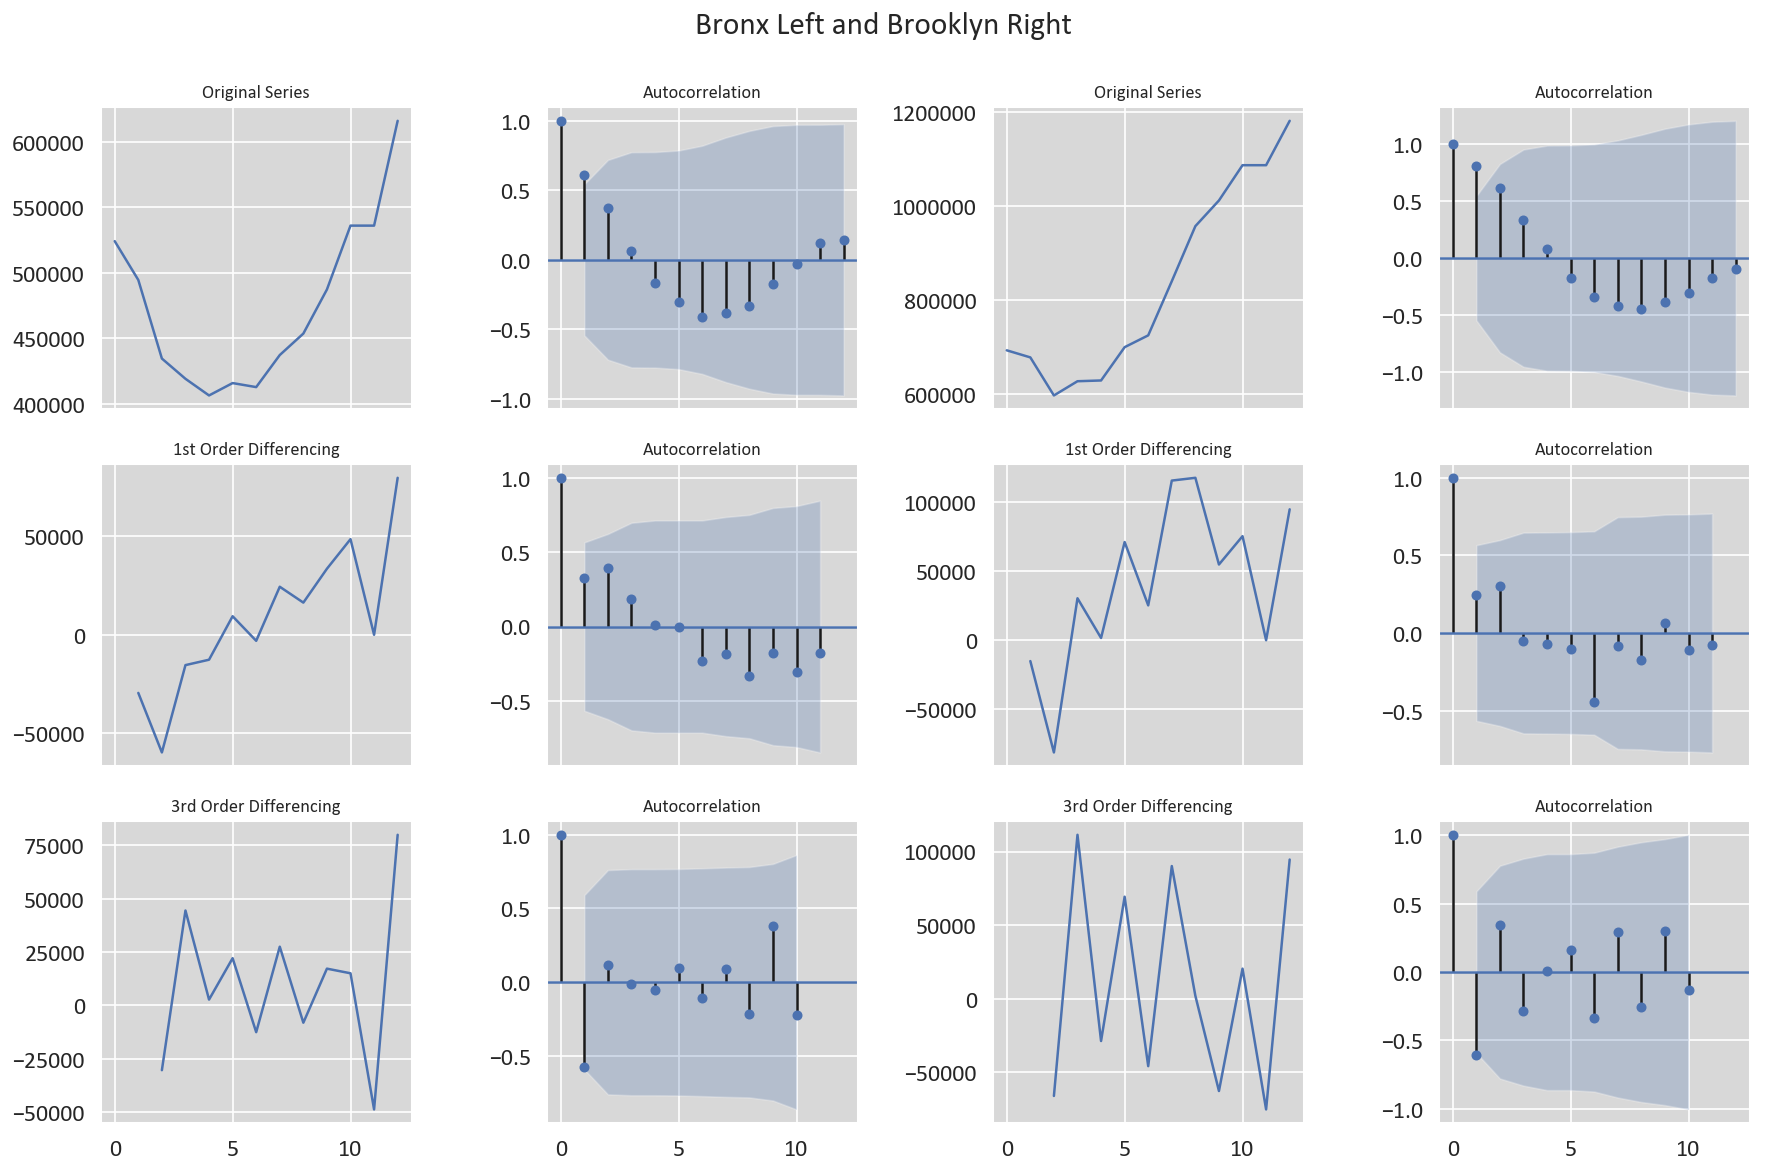

In [38]:
fig, axes = plt.subplots(3, 4, sharex=True, figsize=(15, 10))
count = 0
for i in range(0,2):
    
    axes[0, count].plot(final_df[i]['AVERAGE SALE PRICE']); axes[0, count].set_title('Original Series', fontsize = 11)
    plot_acf(final_df[i]['AVERAGE SALE PRICE'], ax=axes[0, count+1])
    axes[0,count+1].set_title('Autocorrelation', fontsize = 11)
    
    # 1st Differencing
    axes[1, count].plot(final_df[i]['AVERAGE SALE PRICE'].diff()); axes[1, count].set_title('1st Order Differencing',fontsize = 11)
    plot_acf(final_df[i]['AVERAGE SALE PRICE'].diff().dropna(), ax=axes[1, count+1])
    axes[1,count+1].set_title('Autocorrelation', fontsize = 11)
    
    # 2nd Differencing
    axes[2, count].plot(final_df[i]['AVERAGE SALE PRICE'].diff().diff()); axes[2, count].set_title('2nd Order Differencing',fontsize = 11)
    plot_acf(final_df[i]['AVERAGE SALE PRICE'].diff().diff().dropna(), ax=axes[2, count+1])
    axes[2,count+1].set_title('Autocorrelation', fontsize = 11)

    
    count += 2
plt.suptitle('Bronx Left and Brooklyn Right')
plt.tight_layout()
plt.subplots_adjust(top = 0.9)
plt.show()

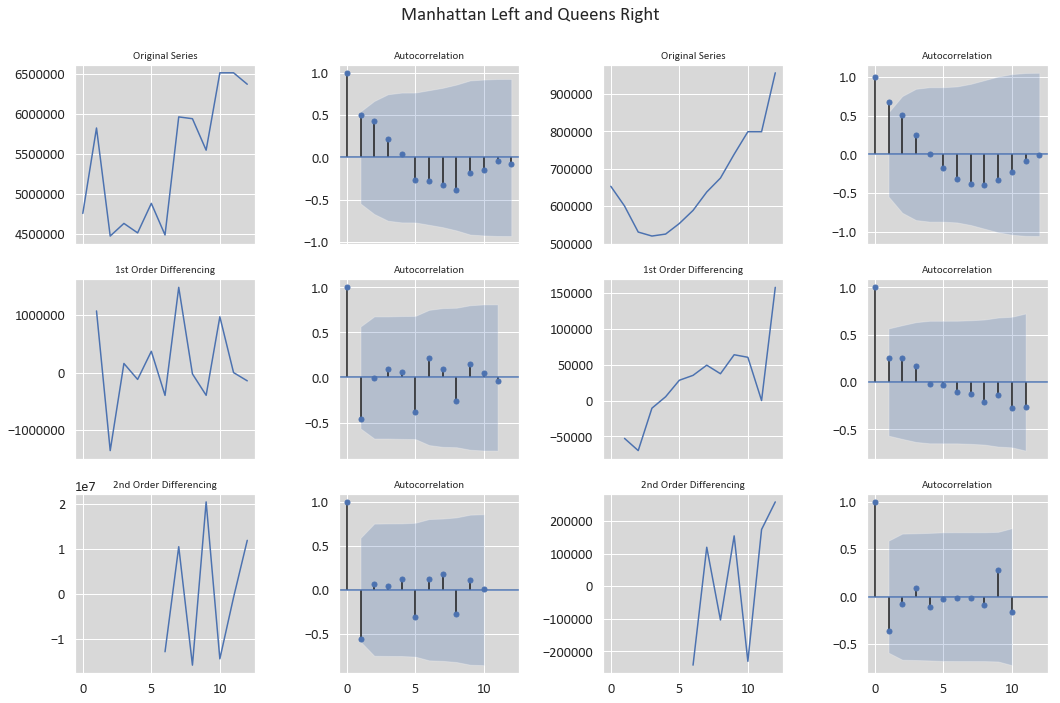

In [35]:
fig, axes = plt.subplots(3, 4, sharex=True, figsize=(15, 10))
count = 0
for i in range(2,4):
    
    axes[0, count].plot(final_df[i]['AVERAGE SALE PRICE']); axes[0, count].set_title('Original Series', fontsize = 11)
    plot_acf(final_df[i]['AVERAGE SALE PRICE'], ax=axes[0, count+1])
    axes[0,count+1].set_title('Autocorrelation', fontsize = 11)
    
    # 1st Differencing
    axes[1, count].plot(final_df[i]['AVERAGE SALE PRICE'].diff()); axes[1, count].set_title('1st Order Differencing',fontsize = 11)
    plot_acf(final_df[i]['AVERAGE SALE PRICE'].diff().dropna(), ax=axes[1, count+1])
    axes[1,count+1].set_title('Autocorrelation', fontsize = 11)
    
    # 2nd Differencing
    axes[2, count].plot(final_df[i]['AVERAGE SALE PRICE'].diff().diff().diff().diff().diff().diff()); axes[2, count].set_title('2nd Order Differencing',fontsize = 11)
    plot_acf(final_df[i]['AVERAGE SALE PRICE'].diff().diff().dropna(), ax=axes[2, count+1])
    axes[2,count+1].set_title('Autocorrelation', fontsize = 11)

    
    count += 2
plt.suptitle('Manhattan Left and Queens Right')
plt.tight_layout()
plt.subplots_adjust(top = 0.9)
plt.show()

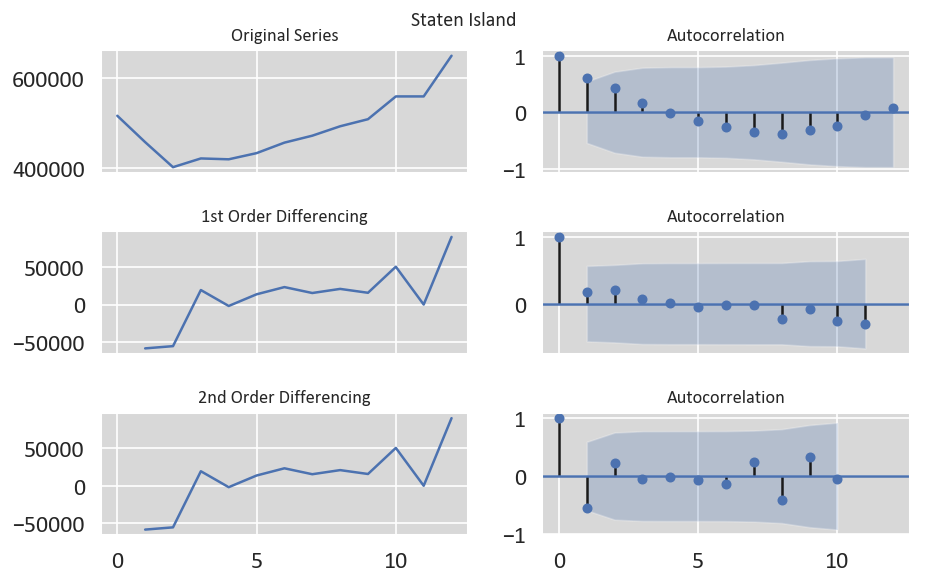

In [41]:
plt.rcParams.update({'figure.figsize':(8,5), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(final_df[4]['AVERAGE SALE PRICE']); axes[0, 0].set_title('Original Series',fontsize = 11)
plot_acf(final_df[4]['AVERAGE SALE PRICE'], ax=axes[0, 1])
axes[0,1].set_title('Autocorrelation', fontsize = 11)
# 1st Differencing
axes[1, 0].plot(final_df[4]['AVERAGE SALE PRICE'].diff()); axes[1, 0].set_title('1st Order Differencing',fontsize = 11)
plot_acf(final_df[4]['AVERAGE SALE PRICE'].diff().dropna(), ax=axes[1, 1])
axes[1,1].set_title('Autocorrelation', fontsize = 11)
# 2nd Differencing
axes[2, 0].plot(final_df[4]['AVERAGE SALE PRICE'] - final_df[4]['AVERAGE SALE PRICE'].shift(2) ); axes[2, 0].set_title('2nd Order Differencing', fontsize = 11)
plot_acf(final_df[4]['AVERAGE SALE PRICE'].diff().diff().dropna(), ax=axes[2, 1])
axes[2,1].set_title('Autocorrelation', fontsize = 11)

plt.suptitle('Staten Island',fontsize =12)
plt.tight_layout()
plt.show()

### From the above graphs, we can see that all 5 reaches stationarity at 2nd order differencing. Thus, for our ARIMA Model we will be setting it to 2.

##  


<a id='pacf'></a>

## PACF (Partial AutoCorrelation Plot)

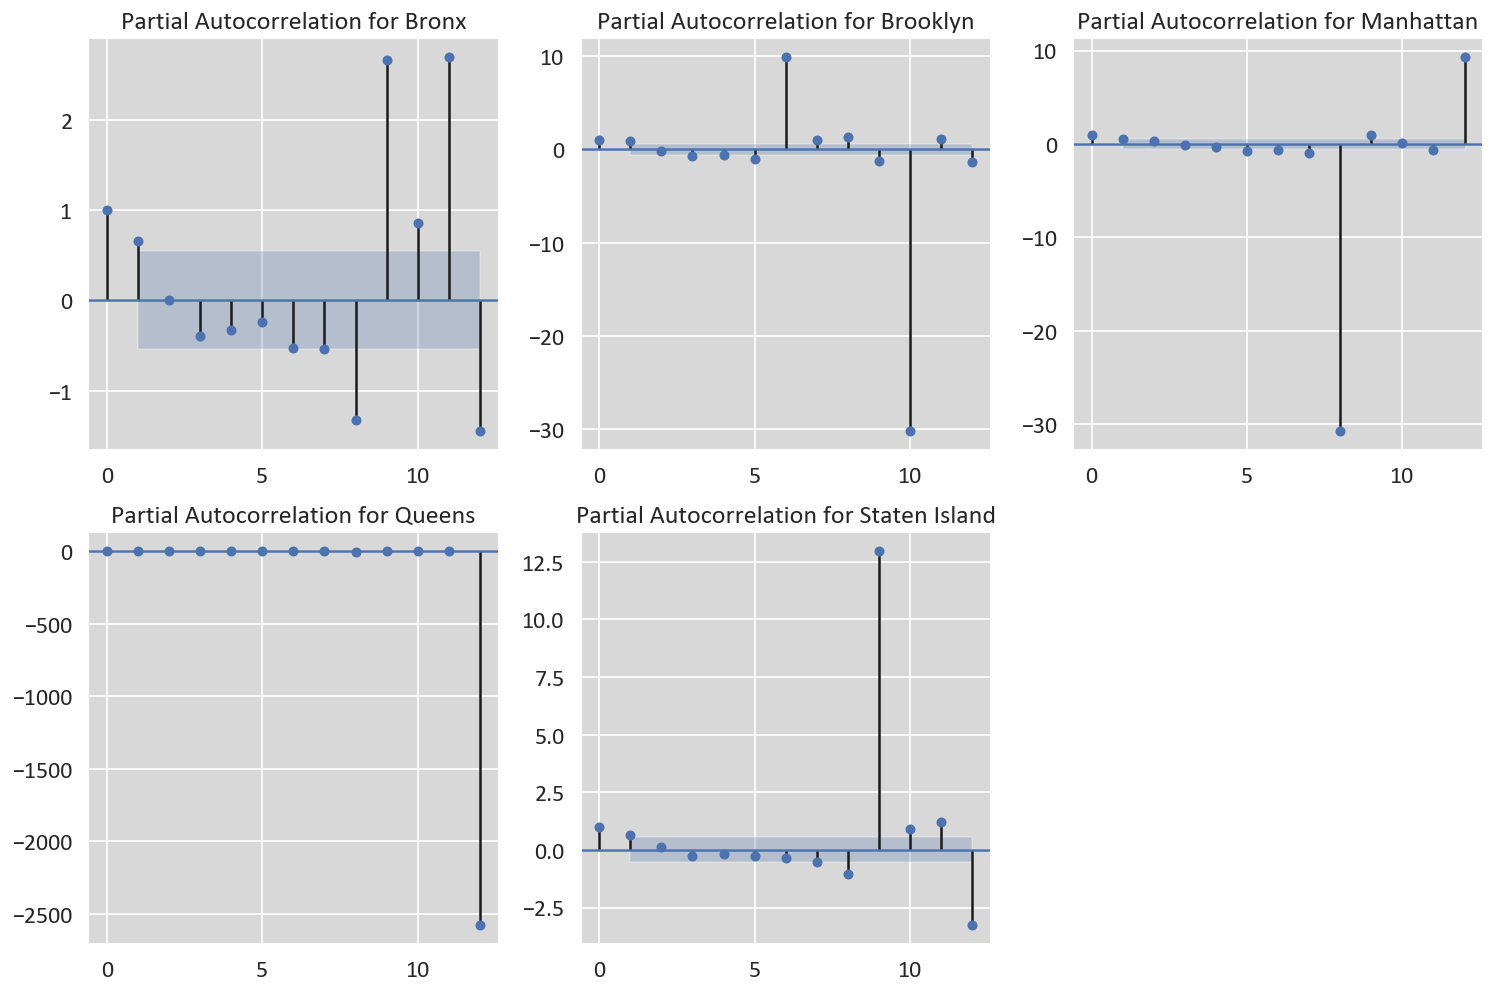

In [31]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(15, 10))
fig.delaxes(ax[1,2])

for i,j in enumerate(ax.reshape(-1)[0:5]):
    plot_pacf(final_df[i]['AVERAGE SALE PRICE'], ax=j)
    j.title.set_text('Partial Autocorrelation for ' + boroughs[i])

plt.show()

 ### We can see that we should be selecting 0 Auto Regressive Terms (Lag) since they are all relatively not significant as they are barely out of the blue band which is the confidence level. Thus we will be selecting 0 AR
 
##    
<a id='acf'></a> 
## ACF (AutoCorrelation Plot)

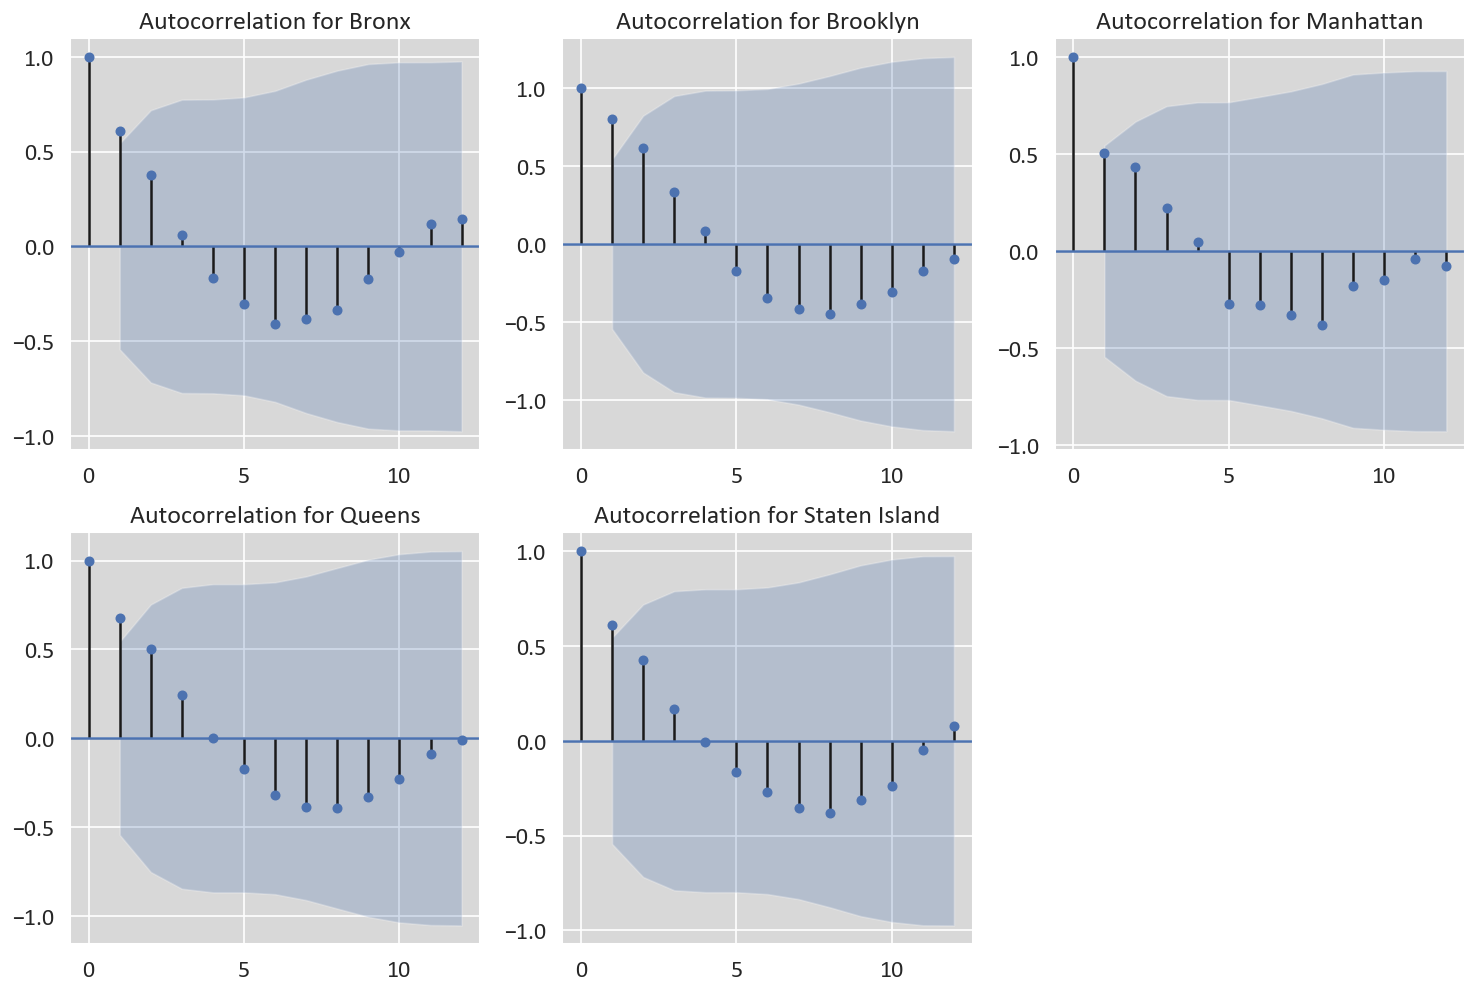

In [32]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(15, 10))
fig.delaxes(ax[1,2])

for i,j in enumerate(ax.reshape(-1)[0:5]):
    plot_acf(final_df[i]['AVERAGE SALE PRICE'], ax=j)
    j.title.set_text('Autocorrelation for ' + boroughs[i])

plt.show()

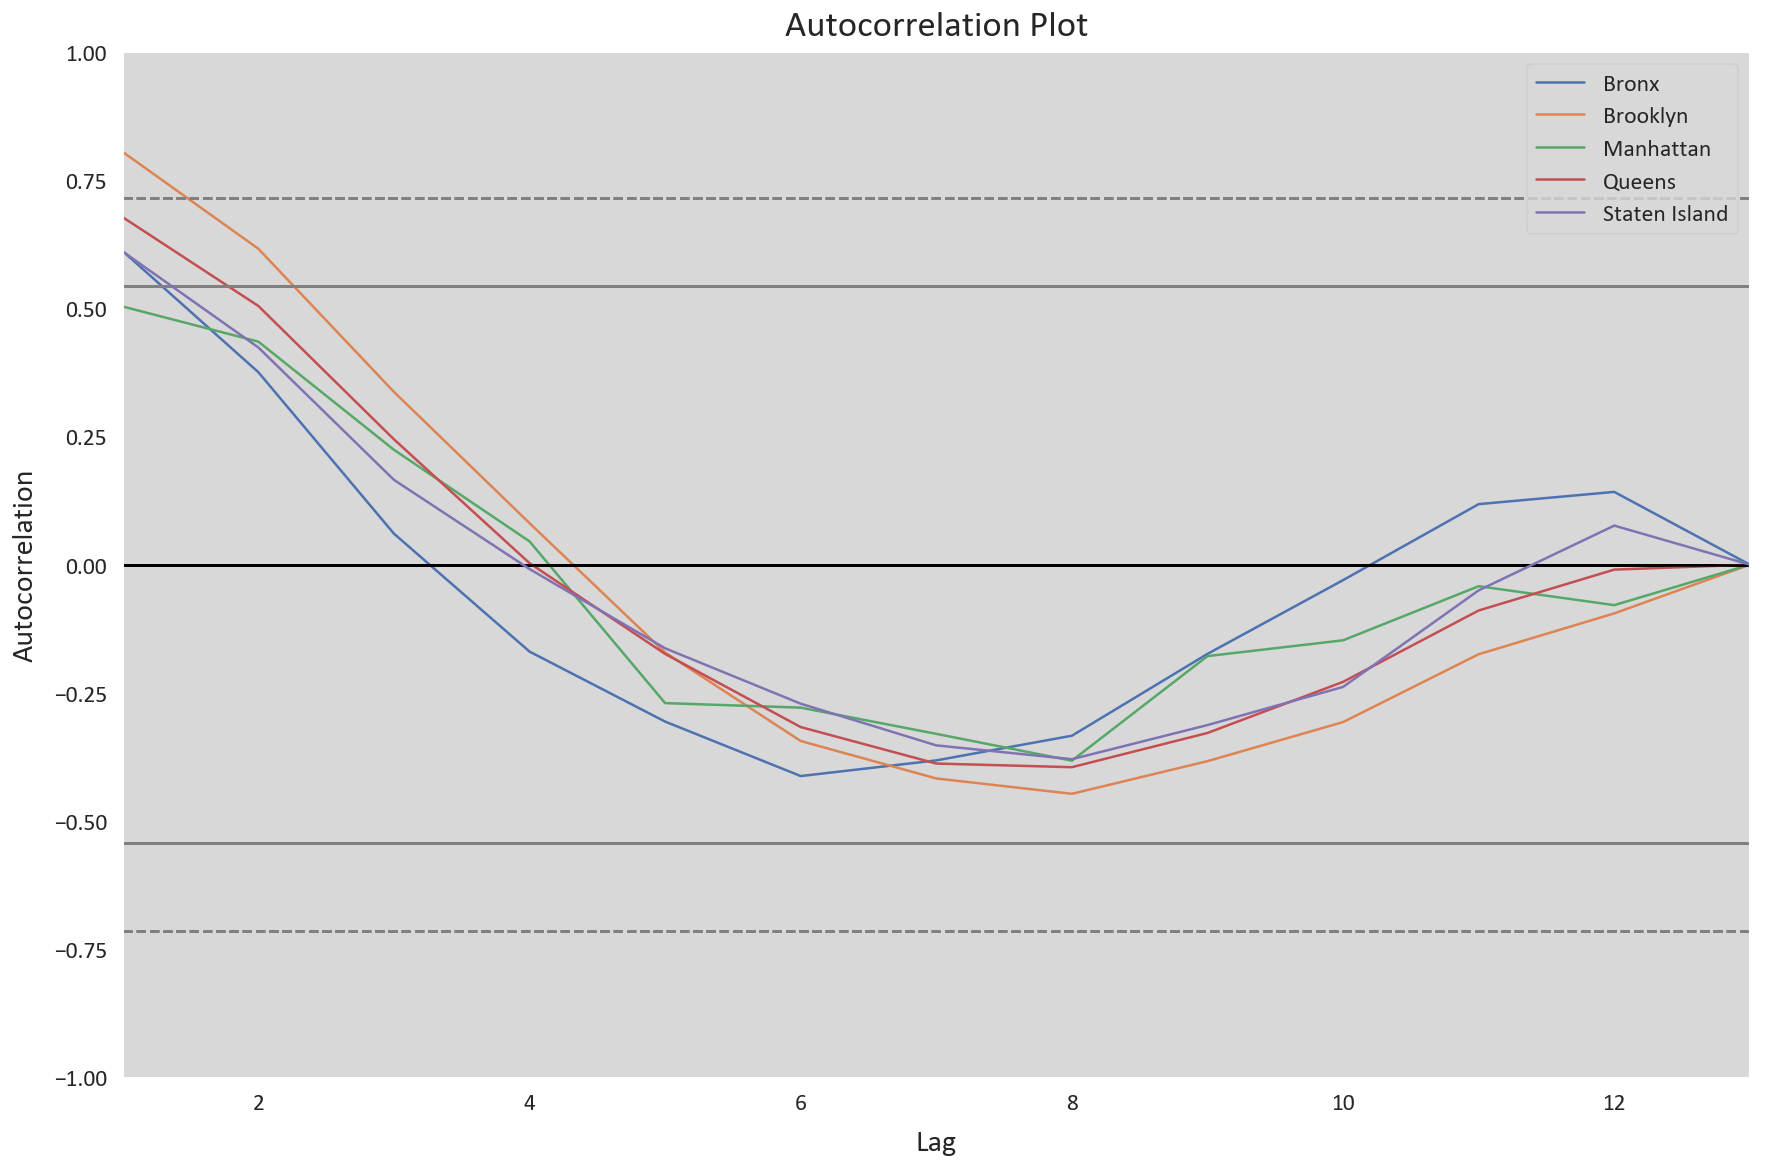

In [33]:
plt.figure(figsize=(15, 10))
 
#Plot ACF: 
for i in range(len(final_df)):
    autocorrelation_plot(final_df[i]['AVERAGE SALE PRICE'], label = boroughs[i])

plt.title("Autocorrelation Plot", 
          pad=10, fontsize=22)
plt.xlabel('Lag', labelpad=10, fontsize=18)
plt.ylabel('Autocorrelation', labelpad=10, fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.tight_layout()

### From the above plot, we can see that the best lag we can choose for all is when it is 1 as all lines except Manhattan crossed the upper confidence band after lag = 1 and Manhattan is also close to it


##  
## Building ARIMA Model


## Normalising Data

<a id='normalising'></a> 

### We will first be scaling our data into a range of 0 to 1 as it is generally a good practice to normalise data before forecasting

In [34]:
#def min_max_scale(data, col):
scaled_data_list = []
borough_names = []
scaler = MinMaxScaler()
for data in final_df:
    scaled_data = scaler.fit_transform(data['AVERAGE SALE PRICE'].values.reshape(-1, 1))
    scaled_data_list.append(scaled_data.reshape(-1))
    borough_names.append(data['BOROUGH'][0])


In [35]:
scaled_data_list

[array([0.5618035 , 0.42046166, 0.13438619, 0.06063812, 0.        ,
        0.04506676, 0.03038438, 0.14713768, 0.2253338 , 0.38586661,
        0.61835999, 0.61835999, 1.        ]),
 array([0.16433196, 0.13857107, 0.        , 0.05178792, 0.05455013,
        0.17579226, 0.21882111, 0.41592292, 0.61645599, 0.70992955,
        0.83837839, 0.83837839, 1.        ]),
 array([0.13873372, 0.66188277, 0.        , 0.07738811, 0.01942398,
        0.200154  , 0.00661623, 0.72990216, 0.71879403, 0.52610941,
        1.        , 1.        , 0.93005127]),
 array([0.30474205, 0.18401995, 0.02439746, 0.        , 0.01211698,
        0.07679232, 0.15705776, 0.26978158, 0.35521393, 0.50122812,
        0.63911111, 0.63911111, 1.        ]),
 array([0.46140953, 0.22464783, 0.        , 0.07834532, 0.07065798,
        0.12593993, 0.2202119 , 0.28248955, 0.36697909, 0.43049499,
        0.63489574, 0.63489574, 1.        ])]

### As you can see, the values are now converted as shown above



### p is the lag value to input which we have chosen to be 0   <br>q is order of differencing which is for making the data stationary, we will be  using 2    <br> d is the moving average which we will be setting to 1 for this case 

### We will be forecasting the next 5 years values


<a id='arimamodel'></a> 

## ARIMA Model

In [36]:
number_of_forecasts = 5
prediction_df = []
scaler = MinMaxScaler()

for i in range(len(scaled_data_list)):
    model = ARIMA(scaled_data_list[i], order=(0,2,1)) #ARIMA(0,2,1) model
    model_fit = model.fit(disp=0)
    output = model_fit.forecast(number_of_forecasts)[0] #forecasting 5 out of sample values
    output1 = model_fit.predict(dynamic = False) #in-sample predicted values
    scaler = scaler.fit(final_df[i]['AVERAGE SALE PRICE'].values.reshape(-1, 1))
    output1_reshaped = scaler.inverse_transform(output1.reshape(-1,1)).reshape(-1) # onverting back to their normal values
    output_forecast_vals = scaler.inverse_transform(output.reshape(-1, 1)).reshape(-1) #converting back to their normal values
    prediction = pd.DataFrame({'Original': final_df[i]['AVERAGE SALE PRICE'].tolist() + \
                                 [np.nan] * 5, 
                      'Predictions': [np.nan] * 2 + output1_reshaped.tolist() + output_forecast_vals.tolist()}) #Attend all into a new df, with 0 as the first value in predicted because of differencing of one period
    
    first_forecast_year = 2020
    index_df = [2020]
    
    for i in range(number_of_forecasts - 1):
        index_df.append(first_forecast_year+1)
        first_forecast_year = first_forecast_year + 1
    prediction.index = final_df[i]['YEAR'].tolist() + index_df #changing index to the year instead of 0 to 17
        
    prediction_df.append(prediction) #adding into one list


<a id='arimaforecast'></a> 

## ARIMA Forecast vs Original Average Sale Price Plot

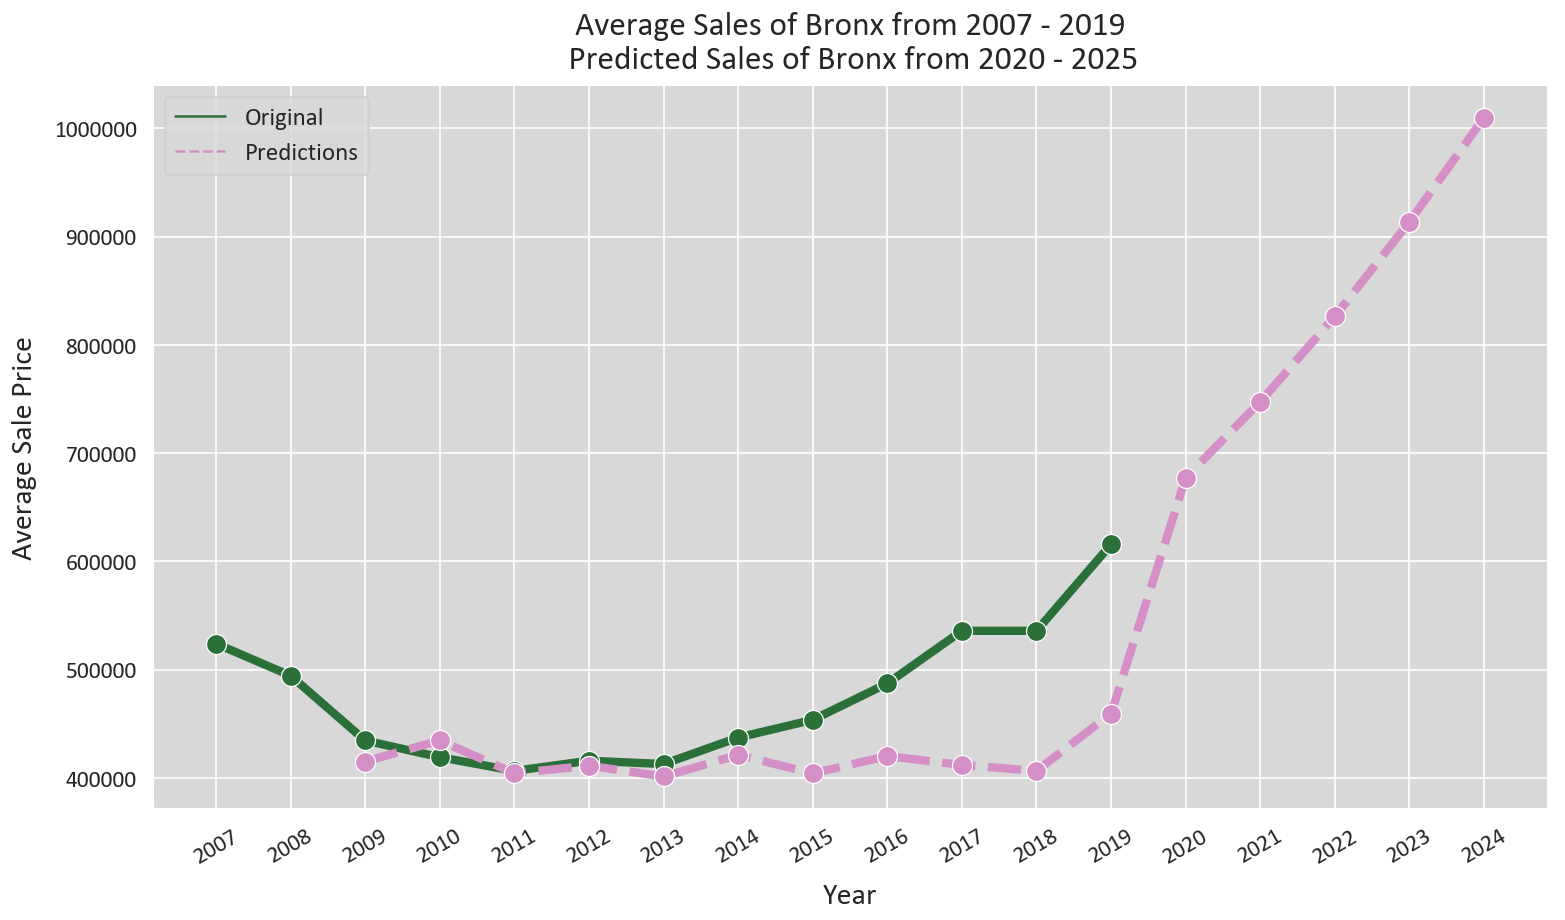

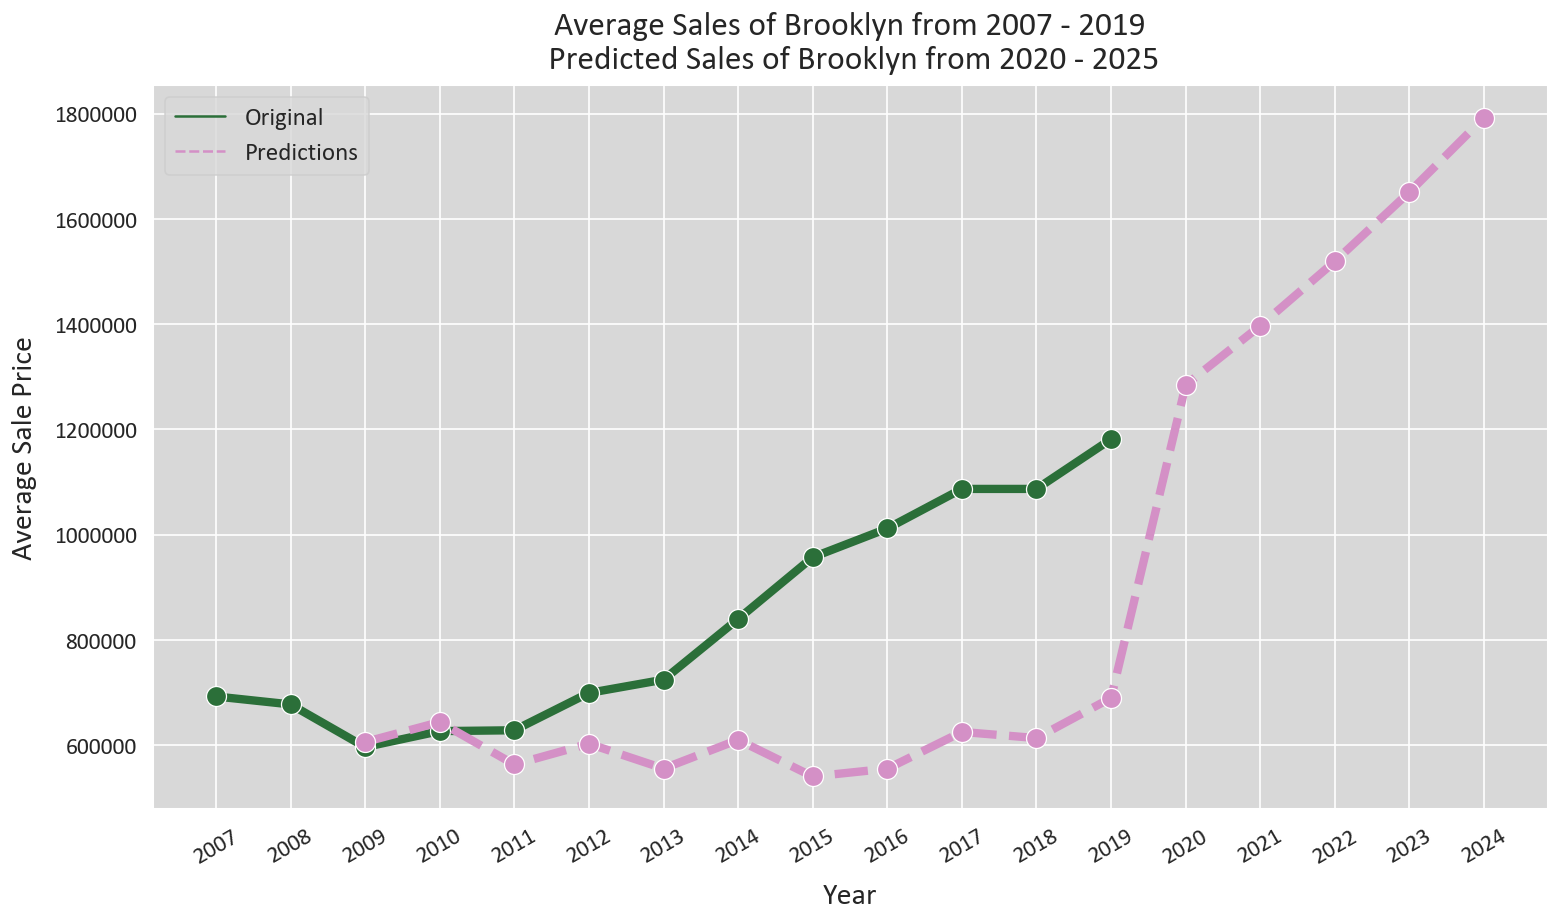

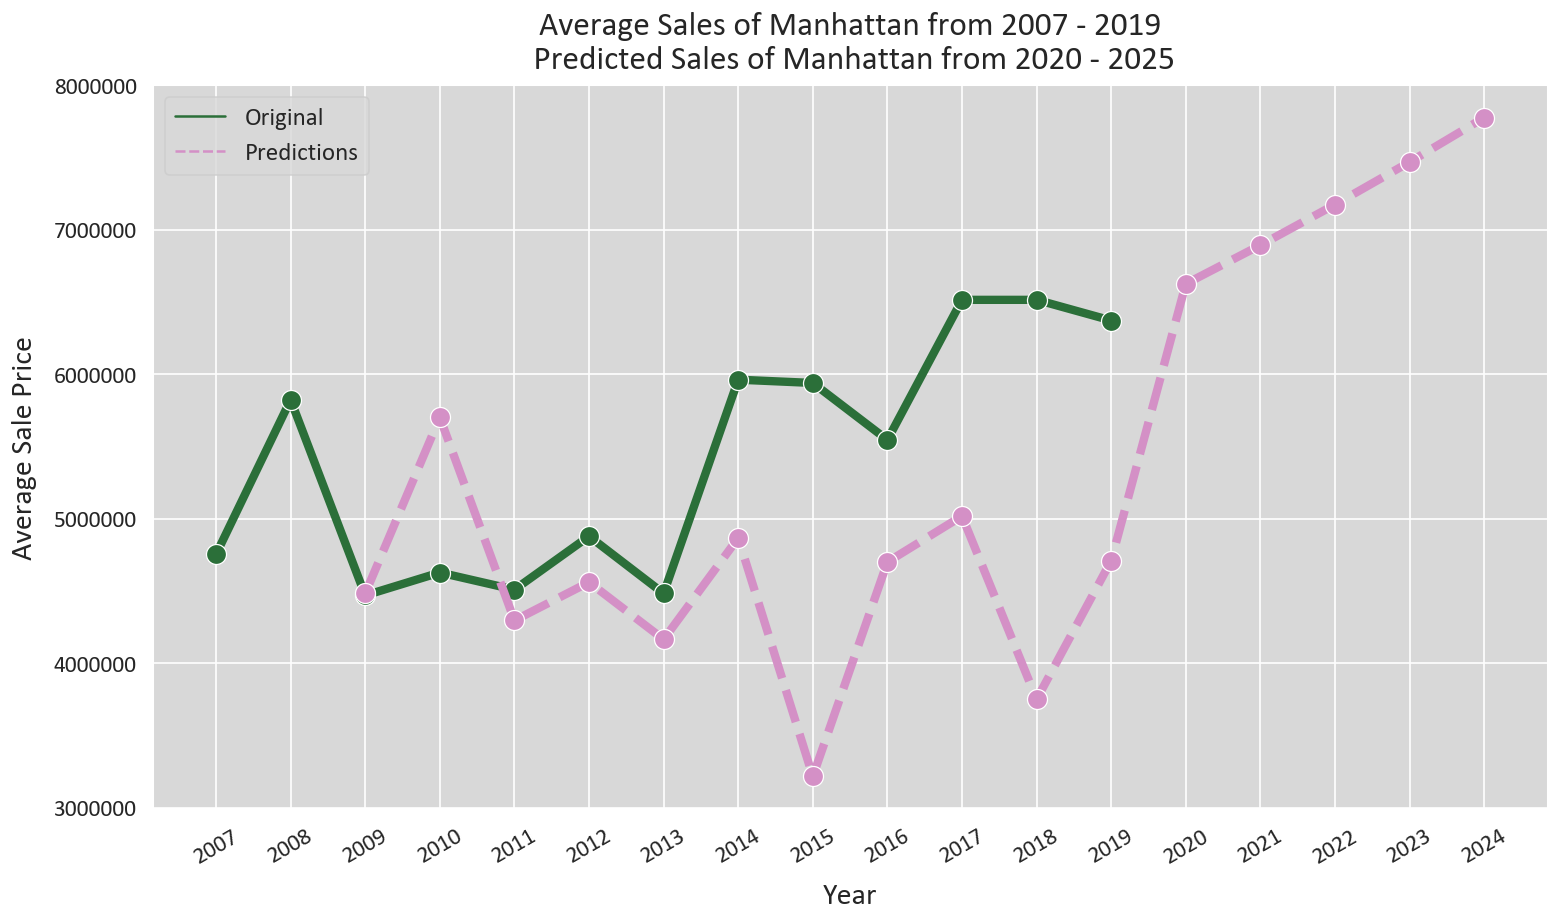

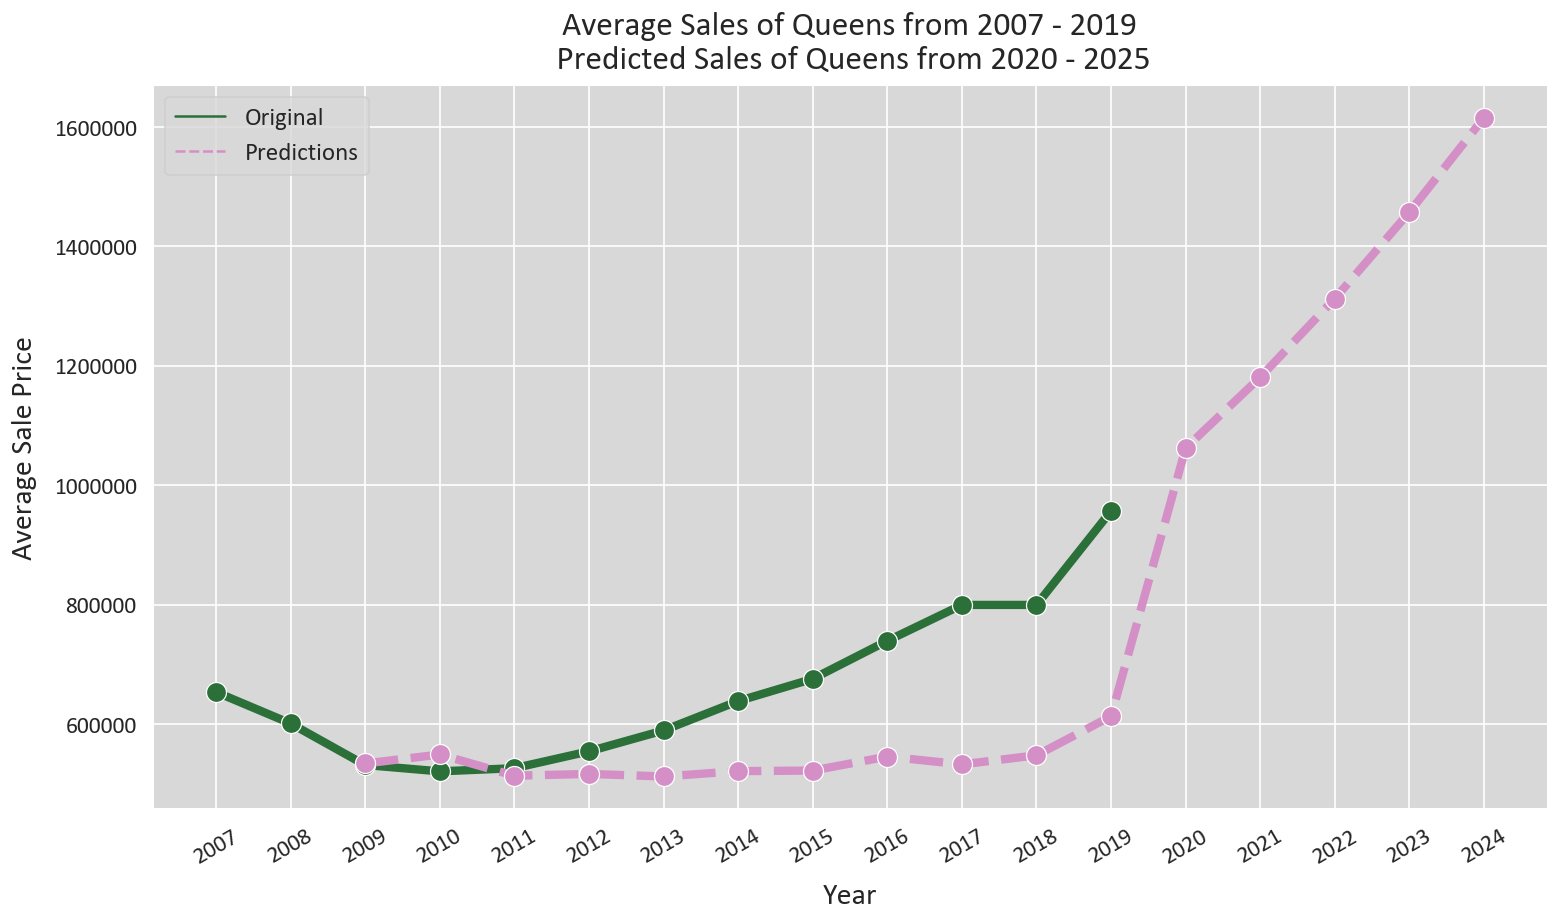

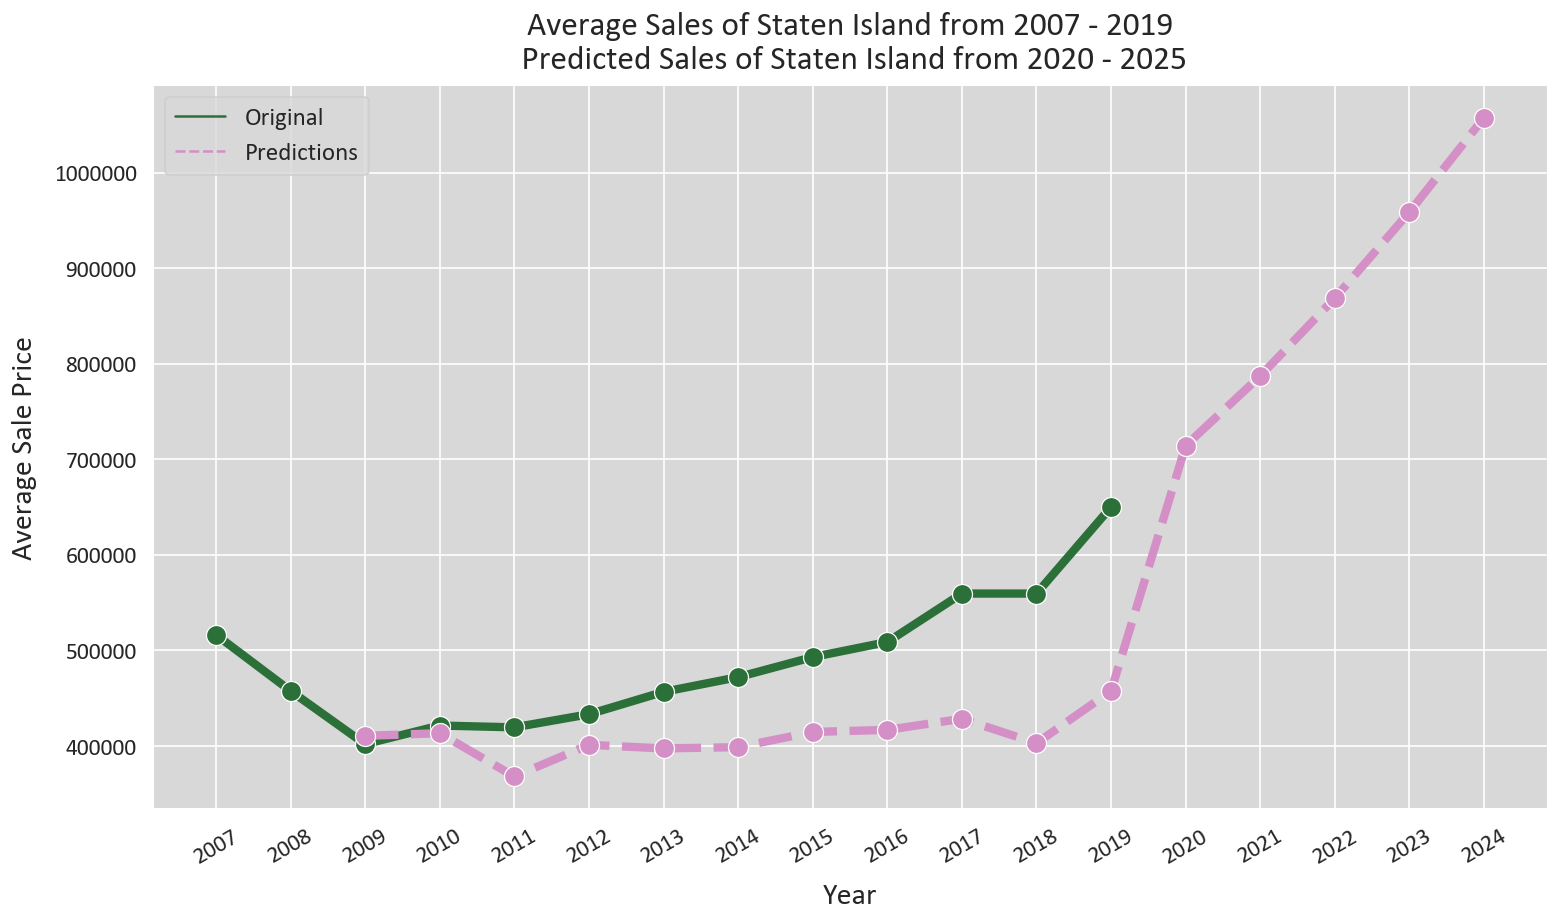

In [37]:
for i ,data in enumerate(prediction_df):
    plt.figure(figsize=(15,8))
    sns.lineplot(data= data , palette='cubehelix', lw=5, marker='o', ms=12)
    plt.xticks(data.index, data.index, rotation=30, fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('Year', labelpad=10, fontsize=18)
    plt.ylabel('Average Sale Price', labelpad=10, fontsize=18)
    plt.title\
    ("Average Sales of {0} from 2007 - 2019\n Predicted Sales of {0} from 2020 - {1}".\
         format(boroughs[i], 2020 + number_of_forecasts), pad=10, fontsize=20)
    plt.legend(fontsize=15)
    plt.show()


<a id='mape'></a> 


## MAPE (Mean Absolute Percentage Error) for ARIMA per borough


In [38]:
for i in range(len(prediction_df)):
    og = prediction_df[i]['Original']
    new = prediction_df[i]['Predictions']
    mape = (np.mean(np.abs((new.iloc[2:13,] - og.iloc[2:13,]))/np.abs(og.iloc[2:13,]))*100)
    print('MAPE for ' + boroughs[i] + '= ' + str(mape) +'%')
    print('Accuracy For Future Predictions = ' + str(100 - mape) + '%' )
    print()

MAPE for Bronx= 10.319139576726993%
Accuracy For Future Predictions = 89.680860423273%

MAPE for Brooklyn= 26.845232332512126%
Accuracy For Future Predictions = 73.15476766748787%

MAPE for Manhattan= 19.338448170520937%
Accuracy For Future Predictions = 80.66155182947907%

MAPE for Queens= 17.862085697844915%
Accuracy For Future Predictions = 82.13791430215508%

MAPE for Staten Island= 15.20092546669323%
Accuracy For Future Predictions = 84.79907453330677%



### As seen, our model is quite accurate, with the lowest accuracy being 73% and the highest being 89%. Thus, we should be using ARIMA for our predictions